<font size="10">Heart Disease Prediction
</font>

In [1]:
import pandas as pd
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)

<font size="5">Importing Dataset</font>

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

In [3]:
X.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


<font size="5">Data Preprocessing</font>


In [4]:
X.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [5]:
X.loc[:, 'ca'] = X['ca'].fillna(X['ca'].mean())
X.loc[:, 'thal'] = X['thal'].fillna(X['thal'].mean())

In [6]:
y.isna().sum()

num    0
dtype: int64

In [7]:
y.loc[:, 'num'] = y['num'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<font size="3">First we use machine learning algorithm, and then AutoML. Finally we compare the results.</font>

<font size="5">SVM</font>

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
svm_cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
svm_cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for svm = {}'.format((svm_cm_train[0][0] + svm_cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((svm_cm_test[0][0] + svm_cm_test[1][1])/len(y_test)))



Accuracy for training set for svm = 0.9256198347107438
Accuracy for test set for svm = 0.8032786885245902


/home/ramyazdi/anaconda3/envs/obj1/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<font size="5">Navie Bayes</font>

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
nb_cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
nb_cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Naive Bayes = {}'.format((nb_cm_train[0][0] + nb_cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((nb_cm_test[0][0] + nb_cm_test[1][1])/len(y_test)))



Accuracy for training set for Naive Bayes = 0.8677685950413223
Accuracy for test set for Naive Bayes = 0.7868852459016393


/home/ramyazdi/anaconda3/envs/obj1/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<font size="5">Logistic Regression</font>

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
lr_cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
lr_cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((lr_cm_train[0][0] + lr_cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((lr_cm_test[0][0] + lr_cm_test[1][1])/len(y_test)))

/home/ramyazdi/anaconda3/envs/obj1/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy for training set for Logistic Regression = 0.8636363636363636
Accuracy for test set for Logistic Regression = 0.8032786885245902


/home/ramyazdi/anaconda3/envs/obj1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<font size="5">LightGBM</font>

In [12]:
# applying lightGBM
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label = y_train)
params = {}

clf = lgb.train(params, d_train, 100)
#Prediction
y_pred = clf.predict(X_test)
#convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>= 0.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
       
from sklearn.metrics import confusion_matrix
lg_cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = clf.predict(X_train)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
       
lg_cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for LightGBM = {}'.format((lg_cm_train[0][0] + lg_cm_train[1][1])/len(y_train)))
print('Accuracy for test set for LightGBM = {}'.format((lg_cm_test[0][0] + lg_cm_test[1][1])/len(y_test)))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] Start training from score 0.466942
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

<font size="5">XGBoost</font>

In [13]:
# applying XGBoost

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.20, random_state = 0)

from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

from sklearn.metrics import confusion_matrix
xg_cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = xg.predict(X_train)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
       
xg_cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for XGBoost = {}'.format((xg_cm_train[0][0] + xg_cm_train[1][1])/len(y_train)))
print('Accuracy for test set for XGBoost = {}'.format((xg_cm_test[0][0] + xg_cm_test[1][1])/len(y_test)))


Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.7868852459016393


<font size="5">AutoML</font>

In [14]:
import autosklearn.classification

automl_classifier = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,  # Maximum time allowed for search in seconds
    per_run_time_limit=30,  # Maximum time allowed for each model evaluation in seconds
    ensemble_size=1,  # Number of models to ensemble at the end
    n_jobs=-1  # Use all available CPU cores
)

# Fit the AutoML model to the training data
automl_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = automl_classifier.predict(X_test)


/tmp/ipykernel_3619/2693886520.py:3: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 1}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  automl_classifier = autosklearn.classification.AutoSklearnClassifier(
/home/ramyazdi/anaconda3/envs/obj1/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [15]:
# Calculate and print the accuracy
from sklearn.metrics import accuracy_score

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
AutoMl = "{:.2f}".format(accuracy)

Accuracy: 0.80


<font size="5">Model Comparison</font>

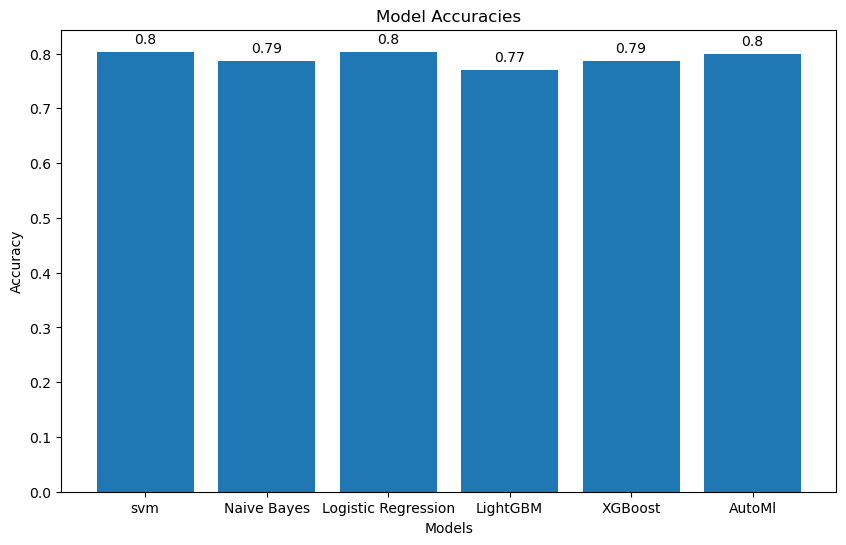

In [24]:
import matplotlib.pyplot as plt

# Calculate accuracies
svm = (svm_cm_test[0][0] + svm_cm_test[1][1])/len(y_test)
naive_bayes = (nb_cm_test[0][0] + nb_cm_test[1][1])/len(y_test)
logistic_regression = (lr_cm_test[0][0] + lr_cm_test[1][1])/len(y_test)
lightgbm = (lg_cm_test[0][0] + lg_cm_test[1][1])/len(y_test)
xgboost = (xg_cm_test[0][0] + xg_cm_test[1][1])/len(y_test)
AutoMl = float("{:.2f}".format(accuracy))  # Store as float

# Store accuracies and model names in lists
accuracies = [svm, naive_bayes, logistic_regression, lightgbm, xgboost, AutoMl]
models = ['svm', 'Naive Bayes', 'Logistic Regression', 'LightGBM', 'XGBoost', 'AutoMl']

# Create a new figure with increased width
plt.figure(figsize=(10, 6))  # You can adjust the width and height as needed

# Create bar chart
bars = plt.bar(models, accuracies)

# Add accuracy values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval,2), ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()